## Sentiment Analysis
Sentiment analysis refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information.

### Import the necessary modules


In [ ]:
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Few more modules will be imported while they are required

### Import the dataset

Go here and download the dataset : https://drive.google.com/file/d/1i4TJrwOaRR12fb1HIdNZqfTGVG-n6qUC/view?usp=sharing

In [ ]:
# The dataset is available here
# https://drive.google.com/file/d/1i4TJrwOaRR12fb1HIdNZqfTGVG-n6qUC/view?usp=sharing

df = pd.read_csv('dataset.csv')
df.set_index('index')

,attributes,sentiment,text
index,,,
0,NaN,0,I HATE plane crash movies...ALL of them! In fa...
1,NaN,0,"Richard Dreyfuss is, indeed, in this flick, bu..."
2,NaN,0,"I had some expectation for the movie, since it..."
3,NaN,1,Playwright Sidney Bruhl (a wonderfully over-th...
4,NaN,1,As an employee of the Swedish Air Force I enjo...
...,...,...,...
24995,NaN,0,For months preceding the release of this movie...
24996,NaN,0,Hip. Erotic. Wickedly sexy ... whatever. It's ...
24997,NaN,1,"""Fraidy Cat"", the 4th of these cartoons, is a ..."


#### Printing out the basic information about the dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       25000 non-null  int64  
 1   attributes  0 non-null      float64
 2   sentiment   25000 non-null  int64  
 3   text        25000 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 781.4+ KB


In [ ]:
# Diplaying first 10 data

df.head(10)

,index,attributes,sentiment,text
0,0,NaN,0,I HATE plane crash movies...ALL of them! In fa...
1,1,NaN,0,"Richard Dreyfuss is, indeed, in this flick, bu..."
2,2,NaN,0,"I had some expectation for the movie, since it..."
3,3,NaN,1,Playwright Sidney Bruhl (a wonderfully over-th...
4,4,NaN,1,As an employee of the Swedish Air Force I enjo...
5,5,NaN,1,I saw this film last night on cable and it is ...
6,6,NaN,0,I originally gave this episode a rating of two...
7,7,NaN,1,"First of all, when people hear 'GUY RITCHIE', ..."
8,8,NaN,0,Van Dien must cringe with embarrassment at the...
9,9,NaN,0,Zombi 3 starts as a group of heavily armed men...


### TfidfTransformer
The formula that is used to compute the tf-idf for a term t of a document d in a document set is tf-idf(t, d) = tf(t, d) * idf(t), and the idf is computed as idf(t) = log [ n / df(t) ] + 1 (if smooth_idf=False), where n is the total number of documents in the document set and df(t) is the document frequency of t; the document frequency is the number of documents in the document set that contain the term t. The effect of adding “1” to the idf in the equation above is that terms with zero idf, i.e., terms that occur in all documents in a training set, will not be entirely ignored

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision = 2) #2 decimal roundoff

tfidf = TfidfTransformer(use_idf = True,norm = 'l2',smooth_idf = True) #l2 norm means sum of the squares the elements
                                                                       #in a row is 1
                                                                       #smooth_idf = smoothing function

### Preprocessing

Viewing a data before preprocessing

In [ ]:
df['text'][0]

'I HATE plane crash movies...ALL of them! In fact, I hate them all with a passion! First of all, they are cheap-looking and have no craftsmanship! Secondly, they insult the airline industry and say to the audience that all planes do is...FALL OUT OF THE SKY AND CRASH!  Why I wince at such a film? This could happen to any of us and with worser consequences than those suffered by the characters in said movie...which is the only chilling aspect of an airline disaster yarn such as this. I hate this movie because it\'s like all the 50,000,000 stupid-ass airplane chaos movies before it! Freefall is like all the others: nothing more than boredom before the clichéd bullshit dramatic scenes take place.   First, off we have same cast of retards on this flying death trap: The Cleaver-esquire family of three, the yuppie baastard, and the bitch of a flight attendant complete with a big blond hairdo from 1987 scolding anyone who is the least bit frightened!   My second gripe is this shouldn\'t be a 

Using regex to remove unnecessary letters and using lower()

In [ ]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

In [ ]:
# Using only sentiment and text coloumn

df = df[['sentiment','text']]

In [ ]:
df['text'] = df['text'].apply(preprocessor)

Viewing the data after preprocessing

In [ ]:
df['text'][0]

'i hate plane crash movies all of them in fact i hate them all with a passion first of all they are cheap looking and have no craftsmanship secondly they insult the airline industry and say to the audience that all planes do is fall out of the sky and crash why i wince at such a film this could happen to any of us and with worser consequences than those suffered by the characters in said movie which is the only chilling aspect of an airline disaster yarn such as this i hate this movie because it s like all the 50 000 000 stupid ass airplane chaos movies before it freefall is like all the others nothing more than boredom before the clichéd bullshit dramatic scenes take place first off we have same cast of retards on this flying death trap the cleaver esquire family of three the yuppie baastard and the bitch of a flight attendant complete with a big blond hairdo from 1987 scolding anyone who is the least bit frightened my second gripe is this shouldn t be a full length movie but a docume

### The Porter stemming algorithm (or ‘Porter stemmer’) 
It is a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.

In [ ]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [ ]:
def tokenizer_porter(text) :
    return [porter.stem(word) for word in text.split()]

In [ ]:
# Stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

### TfidfVectorizer - Equivalent to CountVectorizer followed by TfidfTransformer.

#### Bag of Words
Text Analysis is a major application field for machine learning algorithms. However, the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length. 

In order to address this, scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely: 

  - tokenizing strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators. 

  - counting the occurrences of tokens in each document. 

  - normalizing and weighting with diminishing importance tokens that occur in the majority of samples / documents. 

In this scheme, features and samples are defined as follows: 

  - each individual token occurrence frequency (normalized or not) is treated as a feature. 

  - the vector of all the token frequencies for a given document is considered a multivariate sample. 

A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus. 

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document. 


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents = None,
                        preprocessor = None,
                        tokenizer = tokenizer_porter,
                        lowercase = False,
                        use_idf = True,
                        norm = 'l2',
                        smooth_idf = True)
Y = df.sentiment.values
X = tfidf.fit_transform(df.text)

In [ ]:
np.shape(X)

(25000, 51374)

In [ ]:
np.shape(Y)

(25000,)

### Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state = 1,test_size = 0.3,shuffle = True)

### Method 1 - LogisticRegressionCV

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function. This implementation can fit binary, One Vs-Rest, or multinomial logistic regression with optional l1, l2 or Elastic-Net regularization.

In [ ]:
import pickle  ## saving model for future reference
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv = 5,scoring = 'accuracy',random_state = 0,n_jobs = -1,
                            verbose = 3,max_iter = 300).fit(X_train,y_train)

project_model = open('project_model.sav','wb')
pickle.dump(clf,project_model)
project_model.close()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


In [ ]:
import pickle
filename = 'project_model.sav'
project_clf = pickle.load(open(filename,'rb'))

In [ ]:
lrcv_acc = project_clf.score(X_test,y_test)   ## prediction accuracy
print("LogisticRegressionCV Accuracy:",lrcv_acc)

LogisticRegressionCV Accuracy: 0.8917333333333334


### Method 2 - MultinomialNB

MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice). The distribution is parametrized by vectors 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
mnb_acc = metrics.accuracy_score(y_test, predicted)
print("MultinomialNB Accuracy:",mnb_acc)

MultinomialNB Accuracy: 0.8613333333333333


### Comparison between the two methods demonstrated above

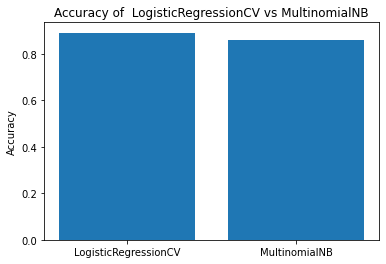

In [ ]:
plt.bar([0.1, 0.2], [lrcv_acc, mnb_acc], width=0.08)
plt.ylabel('Accuracy')
plt.xticks([0.1, 0.2], ['LogisticRegressionCV', 'MultinomialNB'])
plt.title('Accuracy of  LogisticRegressionCV vs MultinomialNB')
plt.show()